In [1]:
import numpy as np
import pandas as pd
import datetime

file = 'north.csv'

#df = pd.DataFrame((pd.read_csv(file,header=0, delimiter=',')),columns=[float, datetime])

raw_data = pd.read_csv(file,header=0, delimiter=',')
data = np.array(raw_data)


#df = pd.DataFrame(data[:,0:3], columns = ['usage', 'supply','temp'], index=data[:,3], dtype=float)
df = pd.DataFrame(data, columns = ['usage', 'supply','temp','date'])
df['supply'] = df['supply'].apply(pd.to_numeric)
df['usage'] = df['usage'].apply(pd.to_numeric)
df['temp'] = df['temp'].apply(pd.to_numeric)
df['date'] = df['date'].apply(pd.to_datetime)
#df.index = pd.to_datetime(df.index)

df.fillna(0)
#print(df.ix[:, "max_supply"].isnull()) 

print(df)
df.info()

      usage  supply  temp       date
0    1099.4   943.0  32.6 2016-10-01
1    1031.6   872.9  34.8 2016-10-02
2    1275.4  1150.5  32.5 2016-10-03
3    1263.0  1139.6  32.3 2016-10-04
4    1282.9  1150.8  30.6 2016-10-05
5    1295.1  1099.9  33.1 2016-10-06
6    1222.4  1108.1  27.1 2016-10-07
7    1041.2   890.7  31.3 2016-10-08
8     896.2   739.8  24.2 2016-10-09
9     939.2   837.1  23.9 2016-10-10
10   1153.0  1012.7  27.5 2016-10-11
11   1127.9  1011.5  24.4 2016-10-12
12   1114.8  1044.8  26.0 2016-10-13
13   1118.2  1049.5  26.5 2016-10-14
14   1018.1   957.5  29.4 2016-10-15
15    975.3   889.0  31.9 2016-10-16
16   1225.7  1075.3  31.3 2016-10-17
17   1251.4  1086.3  31.8 2016-10-18
18   1260.7  1089.1  31.5 2016-10-19
19   1282.7  1065.0  32.8 2016-10-20
20   1301.1  1084.9  34.2 2016-10-21
21   1108.0  1005.9  31.8 2016-10-22
22   1018.8   910.9  32.9 2016-10-23
23   1206.4  1086.9  29.4 2016-10-24
24   1182.4  1096.6  33.5 2016-10-25
25   1296.6  1164.3  33.4 2016-10-26
2

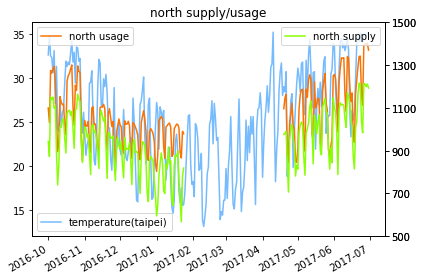

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()

ax1.plot(df['date'], df['temp'],label="temperature(taipei)",color='xkcd:sky blue')

line_usage = ax1.twinx()
line_supply = ax1.twinx()

line_usage.plot(df['date'], df['usage'], label="north usage",color='xkcd:orange')
line_supply.plot(df['date'], df['supply'],label="north supply",color='xkcd:lime green')

plt.xlabel('date')
plt.title('north supply/usage')
plt.setp(line_supply, yticks=[500, 700, 900, 1100, 1300, 1500])
plt.setp(line_usage, yticks=[500, 700, 900, 1100, 1300, 1500])
line_supply.set_ylim(500, 1500)
line_usage.set_ylim(500, 1500)

fig.autofmt_xdate()
ax1.legend()
line_usage.legend()
line_supply.legend()
plt.legend(loc="best")
fig.tight_layout()
plt.show()
fig.savefig('north.png', dpi=fig.dpi)